# Text Classification for Restaurant reviews (Sentiment Analysis)

tsv - tab seperated values

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the data

In [2]:
import pandas as pd
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


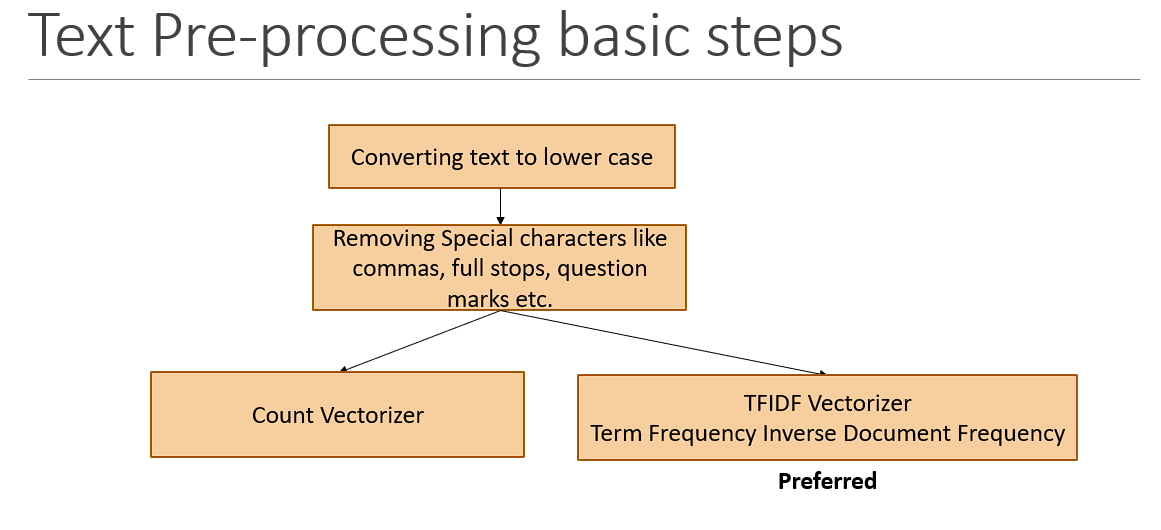

In [3]:
st = "Wow... Loved this place."
s = st.lower()
s

'wow... loved this place.'

In [26]:
import re 
s = re.sub("[^a-z ]","",s)
s

'wow loved this place'

In [5]:
def preprocess_text(st):
    # Convert statement to lower case
    s = st.lower()
    # Remove the punctuation marks
    s = re.sub("[^a-z ]", "", s)
    return s

In [6]:
preprocess_text('Amazing! I just loved this place ...!')

'amazing i just loved this place '

### Applying prprocessing to text in dataframe

In [7]:
df['pre'] = df['Review'].apply(preprocess_text)

In [8]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Apply tfidf vectorizer

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_pre = tf.fit_transform(df['pre']).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X_pre.shape

(1000, 2046)

In [11]:
Y = df['Liked']
Y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [12]:
Y.value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

### Apply train test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2,
                                                random_state=42)

In [14]:
xtrain.shape

(800, 2046)

In [15]:
xtest.shape

(200, 2046)

In [16]:
xtrain.shape[1]

2046

### Create a neural network

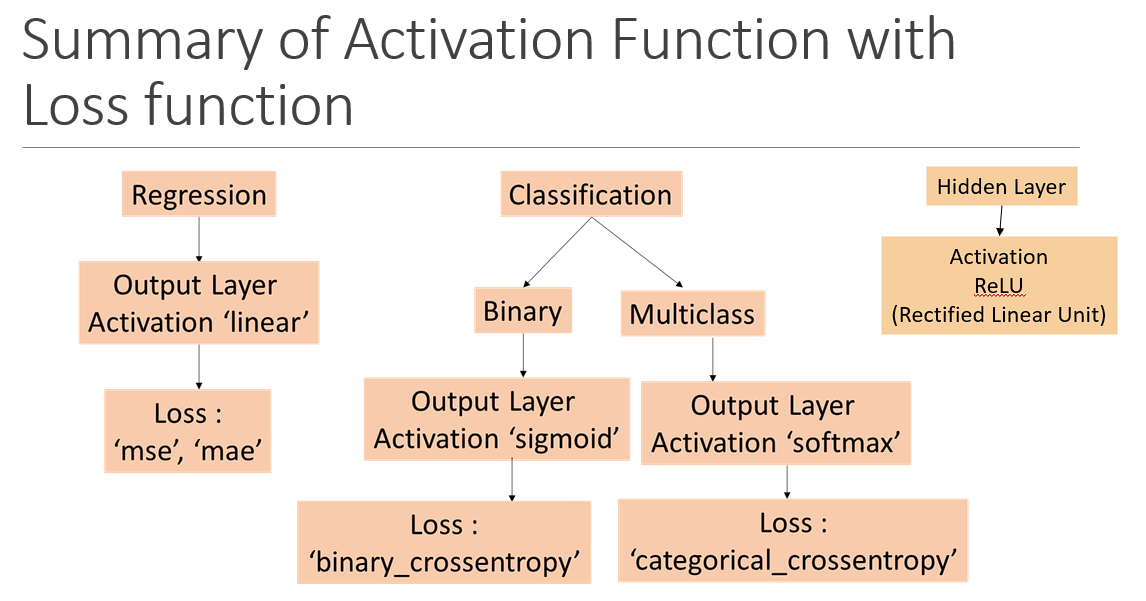

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [18]:
model = Sequential()

# Dense Layer 1
model.add(Dense(units=128, activation='relu', input_shape=(xtrain.shape[1],)))
# Dropout Layer 1
model.add(Dropout(0.6))
# Dense Layer 2
model.add(Dense(units=64, activation='relu'))
# Dropout Layer 2
model.add(Dropout(0.5))
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262016    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
es = EarlyStopping(monitor='val_loss', patience=10)

### Train the model

In [22]:
hist = model.fit(xtrain, ytrain, validation_split=0.1,
                 epochs=100, callbacks=[es])

Epoch 1/100


23/23 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6922 - val_accuracy: 0.5250
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.6139 - val_loss: 0.6884 - val_accuracy: 0.5875
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6679 - accuracy: 0.7125 - val_loss: 0.6730 - val_accuracy: 0.7375
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6165 - accuracy: 0.8222 - val_loss: 0.6364 - val_accuracy: 0.7750
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5230 - accuracy: 0.8625 - val_loss: 0.5618 - val_accuracy: 0.7625
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3709 - accuracy: 0.9181 - val_loss: 0.4788 - val_accuracy: 0.7625
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.9417 - val_loss: 0.4192 - val_accuracy: 0.8000
Epoch 8/10

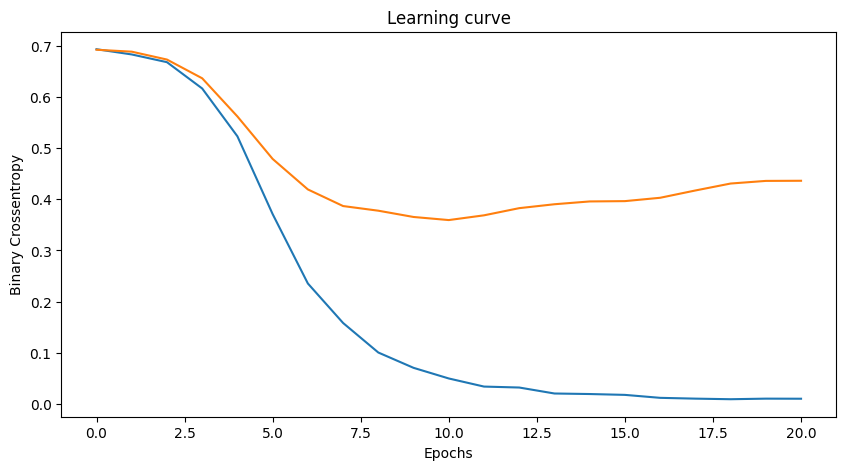

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.title('Learning curve')
plt.show()

### Evaluate the model on train and test data

In [24]:
model.evaluate(xtrain, ytrain)

25/25 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9825


[0.04491444677114487, 0.9825000166893005]

In [25]:
model.evaluate(xtest, ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.6107 - accuracy: 0.8050


[0.6107380390167236, 0.8050000071525574]

### Get probability for train and test

In [27]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [28]:
yprob_tr[0:5]

array([[2.4588164e-03],
       [9.9986190e-01],
       [2.0688355e-04],
       [4.2046374e-04],
       [9.9985689e-01]], dtype=float32)

In [29]:
yprob_ts[0:5]

array([[0.30197608],
       [0.9998272 ],
       [0.9999279 ],
       [0.99952084],
       [0.9966056 ]], dtype=float32)

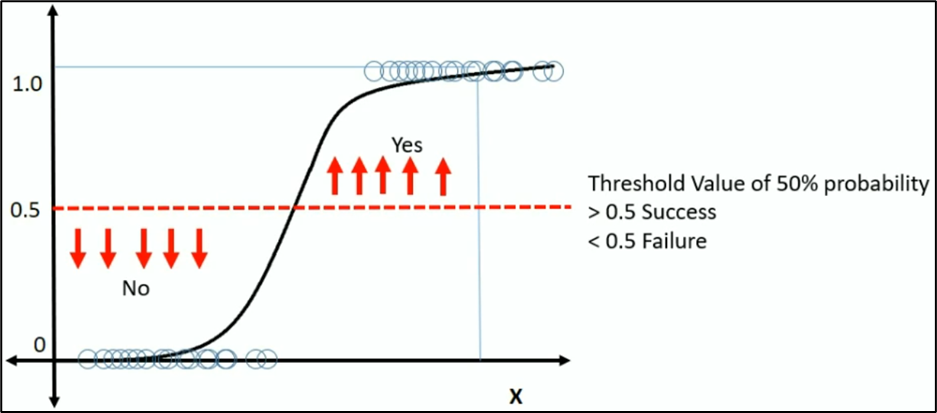

In [30]:
ypred_tr = [1 if prob>=0.5 else 0 for prob in yprob_tr]
ypred_ts = [1 if prob>=0.5 else 0 for prob in yprob_ts]

In [31]:
ypred_tr[0:5]

[0, 1, 0, 0, 1]

In [32]:
ytrain.head()

29     0
535    1
695    0
557    0
836    1
Name: Liked, dtype: int64

In [33]:
ypred_ts[0:5]

[0, 1, 1, 1, 1]

In [34]:
ytest.head()

521    1
737    1
740    1
660    1
411    1
Name: Liked, dtype: int64

### Create a confusion matrix for test data

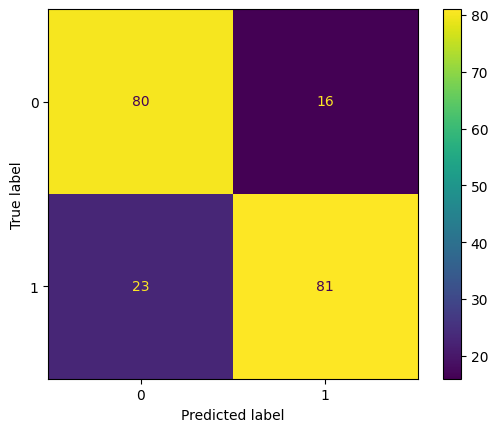

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Check classification report

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        96
           1       0.84      0.78      0.81       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



### Save above model for future use

In [37]:
model.save('Sentiment.keras')

### Load the model

In [38]:
from keras.models import load_model
nn = load_model('Sentiment.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262016    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 270337 (1.03 MB)
Trainable params: 270337 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
def get_sentiment(st, model, tf):
    s = preprocess_text(st)
    s_pre = tf.transform([s]).toarray()
    prob = model.predict([s_pre])
    if prob>=0.5:
        print(f'Given review is POSITIVE with probability : {prob}')
    else:
        print(f'Given review is NEGATIVE with probability : {prob}')

In [44]:
get_sentiment("Very Good resto, I liked this place!", model, tf)

1/1 [==============================] - 0s 40ms/step
Given review is POSITIVE with probability : [[0.9884795]]


In [46]:
get_sentiment("Bad Place! Bad Ambience!", model, tf)

1/1 [==============================] - 0s 38ms/step


Given review is NEGATIVE with probability : [[0.00123366]]
